In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import re
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

In [2]:
a=pd.read_csv(r"E:\Python Data Science\Documents\2011-IND-L3.csv")
a

,ID,Contains potentially disputed international borders,Spatial database year,Total/Rural/Urban Division,Level 0 code,Level 0 name,Level 1 code,Level 1 name,Level 2 code,Level 2 name,...,"Lack of access to durable assets,slums(percent of households)",Area (sq. km.),Population (thousands),Population density (people per sq. km.),Area (sq. km.).1,Population (thousands).1,Population density (people per sq. km.).1,Area (sq. km.).2,Population (thousands).2,Population density (people per sq. km.).2
0,3_24_468_0,0,2011,Rural,3,India,24,Gujarat,468,Kachchh,...,NaN,NaN,NaN,NaN,20018.912109,9.022550,0.450701,20018.912109,9.022550,0.450701
1,3_1_1_1,1,2011,Rural,3,India,1,Jammu and Kashmir,1,Kupwara,...,NaN,1587.0,465.0,293.0,1623.149170,216.979492,133.678101,1623.149170,216.979492,133.678101
2,3_1_1_2,1,2011,Rural,3,India,1,Jammu and Kashmir,1,Kupwara,...,NaN,758.0,256.0,337.0,769.238525,265.403015,345.020447,769.238525,265.403015,345.020447
3,3_1_1_3,1,2011,Rural,3,India,1,Jammu and Kashmir,1,Kupwara,...,NaN,219.0,44.6,203.0,226.805099,40.267254,177.541214,226.805099,40.267254,177.541214
4,3_1_2_4,1,2011,Rural,3,India,1,Jammu and Kashmir,2,Badgam,...,NaN,108.0,67.6,626.0,107.916389,10.668565,98.859543,107.916389,10.668565,98.859543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17500,3_29_572_99999,0,2011,Total,3,India,33,Tamil Nadu,603,Chennai,...,NaN,178.0,4647.0,26157.0,177.648010,4636.003906,26096.570312,177.648010,4636.003906,26096.570312
17501,3_29_572_99999,0,2011,Urban,3,India,33,Tamil Nadu,603,Chennai,...,NaN,177.0,4647.0,26183.0,154.087097,4264.742676,27677.480469,177.648010,4636.003906,26096.570312
17502,3_29_572_99999,0,2011,Rural,3,India,19,West Bengal,342,Kolkata,...,NaN,0.0,0.0,NaN,37.057709,211.863281,5717.117676,0.000000,0.000000,NaN
17503,3_29_572_99999,0,2011,Total,3,India,19,West Bengal,342,Kolkata,...,NaN,194.0,4497.0,23157.0,194.185684,6300.063477,32443.501953,194.185684,6300.063477,32443.501953


In [4]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17505 entries, 0 to 17504
Columns: 211 entries, ID to Population density (people per sq. km.).2
dtypes: float64(200), int64(5), object(6)
memory usage: 28.2+ MB


In [5]:
a.isna()

,ID,Contains potentially disputed international borders,Spatial database year,Total/Rural/Urban Division,Level 0 code,Level 0 name,Level 1 code,Level 1 name,Level 2 code,Level 2 name,...,"Lack of access to durable assets,slums(percent of households)",Area (sq. km.),Population (thousands),Population density (people per sq. km.),Area (sq. km.).1,Population (thousands).1,Population density (people per sq. km.).1,Area (sq. km.).2,Population (thousands).2,Population density (people per sq. km.).2
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17500,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
17501,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
17502,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,True
17503,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [100]:
b=a.fillna(method="ffill").fillna(method="bfill")
c=b.head(100)
d=c[['Contains potentially disputed international borders','Lack of access to durable assets,slums(percent of households)','Area (sq. km.)','Population (thousands).2','Population density (people per sq. km.).2','Area (sq. km.).1','Population (thousands).1']]
d

,Contains potentially disputed international borders,"Lack of access to durable assets,slums(percent of households)",Area (sq. km.),Population (thousands).2,Population density (people per sq. km.).2,Area (sq. km.).1,Population (thousands).1
0,0,3.6,1587.0,9.022550,0.450701,20018.912109,9.022550
1,1,3.6,1587.0,216.979492,133.678101,1623.149170,216.979492
2,1,3.6,758.0,265.403015,345.020447,769.238525,265.403015
3,1,3.6,219.0,40.267254,177.541214,226.805099,40.267254
4,1,3.6,108.0,10.668565,98.859543,107.916389,10.668565
...,...,...,...,...,...,...,...
95,0,3.6,318.0,129.401566,416.791718,318.461334,134.760559
96,0,3.6,61.2,22.936312,375.015991,61.160889,22.936312
97,0,3.6,243.0,83.121986,361.165222,243.411346,106.841652
98,0,3.6,314.0,12.191498,53.915138,328.667480,53.888702


In [101]:
d.isna()

,Contains potentially disputed international borders,"Lack of access to durable assets,slums(percent of households)",Area (sq. km.),Population (thousands).2,Population density (people per sq. km.).2,Area (sq. km.).1,Population (thousands).1
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False


In [102]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Contains potentially disputed international borders            100 non-null    int64  
 1   Lack of access to durable assets,slums(percent of households)  100 non-null    float64
 2   Area (sq. km.)                                                 100 non-null    float64
 3   Population (thousands).2                                       100 non-null    float64
 4   Population density (people per sq. km.).2                      100 non-null    float64
 5   Area (sq. km.).1                                               100 non-null    float64
 6   Population (thousands).1                                       100 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 5.6 KB


# EDA and Visualization

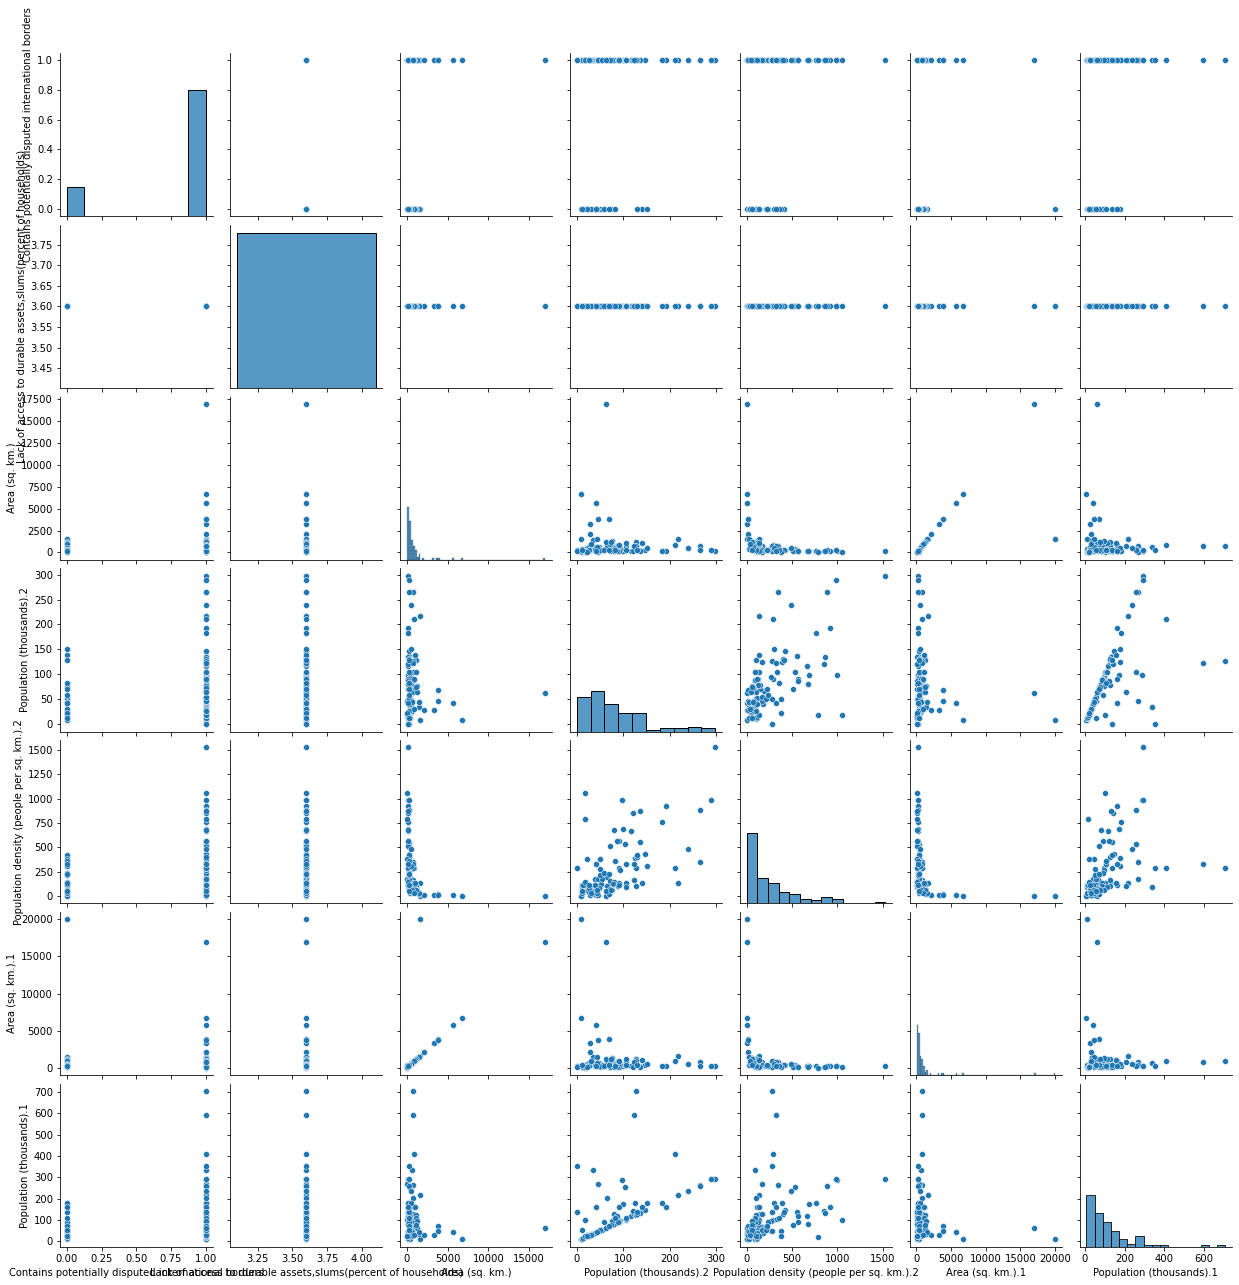

In [103]:
sns.pairplot(d)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Population (thousands).1', ylabel='Density'>

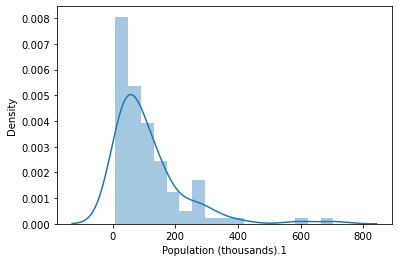

In [104]:
sns.distplot(d["Population (thousands).1"])

# Correlation map


<AxesSubplot:>

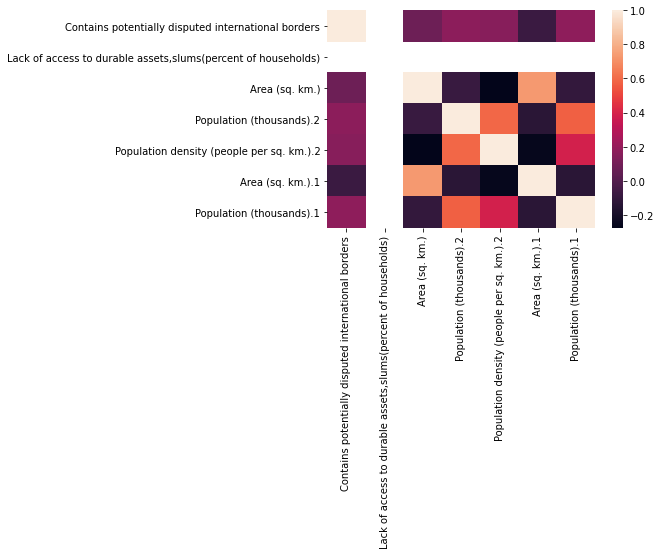

In [105]:
sns.heatmap(x.corr())

<AxesSubplot:>

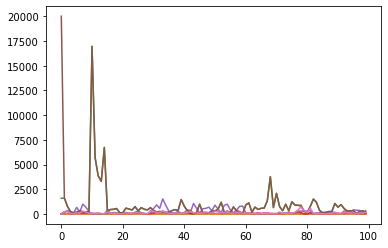

In [142]:
d.plot.line(legend=None)

<AxesSubplot:>

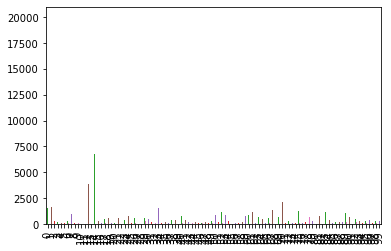

In [143]:
d.plot.bar(legend=None)

<AxesSubplot:>

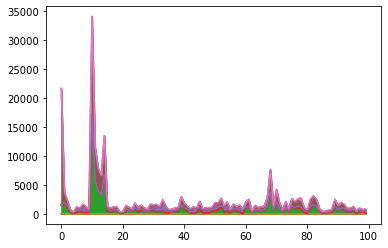

In [144]:
d.plot.area(legend=None)

<AxesSubplot:>

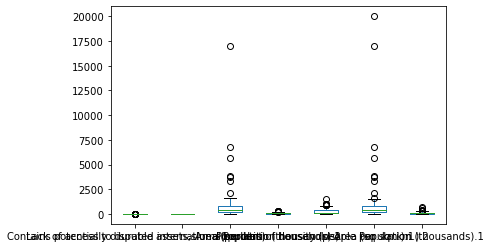

In [145]:
d.plot.box(legend=None)

<AxesSubplot:ylabel='Frequency'>

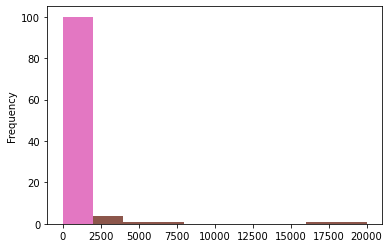

In [146]:
d.plot.hist(legend=None)

<AxesSubplot:xlabel='Area (sq. km.)', ylabel='Area (sq. km.).1'>

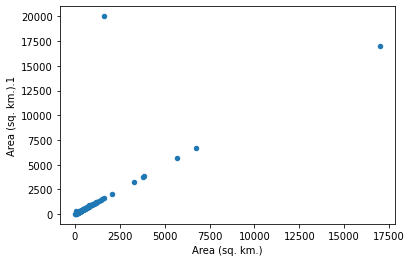

In [147]:
d.plot.scatter(x='Area (sq. km.)',y='Area (sq. km.).1')

<AxesSubplot:ylabel='Area (sq. km.)'>

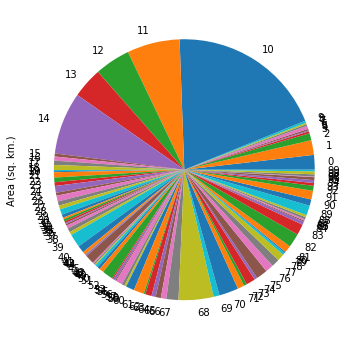

In [149]:
d.plot.pie(y='Area (sq. km.)',figsize=(6,6),legend=None)

# Linear Regression

In [235]:
x=d[['Contains potentially disputed international borders','Lack of access to durable assets,slums(percent of households)','Area (sq. km.)','Population (thousands).2','Population density (people per sq. km.).2','Area (sq. km.).1','Population (thousands).1']]
y=d['Contains potentially disputed international borders']

In [267]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
x_test.shape

(30, 7)

In [237]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [238]:
print(lr.intercept_)

3.779199175824033e-13


In [239]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff

,Co-efficient
Contains potentially disputed international borders,1.000000e+00
"Lack of access to durable assets,slums(percent of households)",-1.051143e-13
Area (sq. km.),4.156488e-20
Population (thousands).2,3.764771e-17
Population density (people per sq. km.).2,-1.382816e-18
Area (sq. km.).1,-1.381291e-19
Population (thousands).1,-1.922071e-17


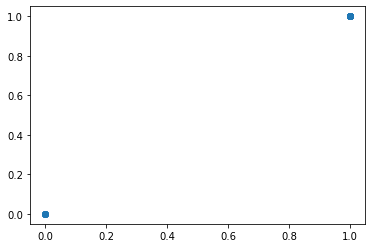

In [240]:
prediction=lr.predict(x_test)
plt.scatter(y_test,prediction)

In [241]:
# Score

print(lr.score(x_test,y_test))

1.0


In [242]:
# Score

print(lr.score(x_train,y_train))

1.0


# Ridge fitting

In [243]:
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [244]:
#Ridge Score
rr.score(x_test,y_test)

0.7286376584539651

# Lasso Fitting

In [245]:
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [246]:
# Lasso Score
la.score(x_test,y_test)

0.015520626244483027

# ElasticNet

In [247]:
en=ElasticNet()
en.fit(x_train,y_train)

ElasticNet()

In [248]:
print(en.coef_)

[ 0.00000000e+00  0.00000000e+00  6.66352035e-05 -0.00000000e+00
  1.00724278e-04 -3.86402041e-05  7.87204032e-04]


In [249]:
print(en.intercept_)

0.6680710947122896


In [250]:
print(en.predict(x_test))

[0.70677191 0.86382514 0.81504655 0.77013365 0.8009921  0.73645359
 0.68945368 0.70666938 0.77844471 0.74084846 0.89177396 1.26868231
 0.73633315 0.7377033  0.69059469 0.8535707  0.79195394 0.81151977
 0.7619401  0.78246416 0.80954011 0.72223099 0.78559615 0.75945648
 0.78089103 0.71982032 0.79534227 0.83217335 0.76559675 1.18829921]


In [251]:
print(en.score(x_test,y_test))

-0.03899244092348497


In [252]:
print(en.score(x_train,y_train))

0.12802686135822028


# Logistic Regression

In [253]:
fs=StandardScaler().fit_transform(x)
logr=LogisticRegression(max_iter=10000)
logr.fit(fs,y)

LogisticRegression(max_iter=10000)

In [254]:
observation=[[12,45,54,87,78,39,64]]
prediction=logr.predict(observation)

In [255]:
print(prediction)

[1]


In [257]:
logr.predict_proba(observation)[0][0]

0.0

# Random Forest

In [258]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [259]:
parameters={'max_depth':[1,2,3,4,5],
           'min_samples_leaf':[5,10,13,20,45],
           'n_estimators':[12,51,32,42,65]}

In [260]:
grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [5, 10, 13, 20, 45],
                         'n_estimators': [12, 51, 32, 42, 65]},
             scoring='accuracy')

In [261]:
grid_search.best_score_

0.8571428571428572

In [262]:
rfc_best=grid_search.best_estimator_

[Text(1395.0, 1223.1, 'X[6] <= 28.412\ngini = 0.224\nsamples = 45\nvalue = [9, 61]'),
 Text(697.5, 407.70000000000005, 'gini = 0.5\nsamples = 5\nvalue = [5, 5]'),
 Text(2092.5, 407.70000000000005, 'gini = 0.124\nsamples = 40\nvalue = [4, 56]')]

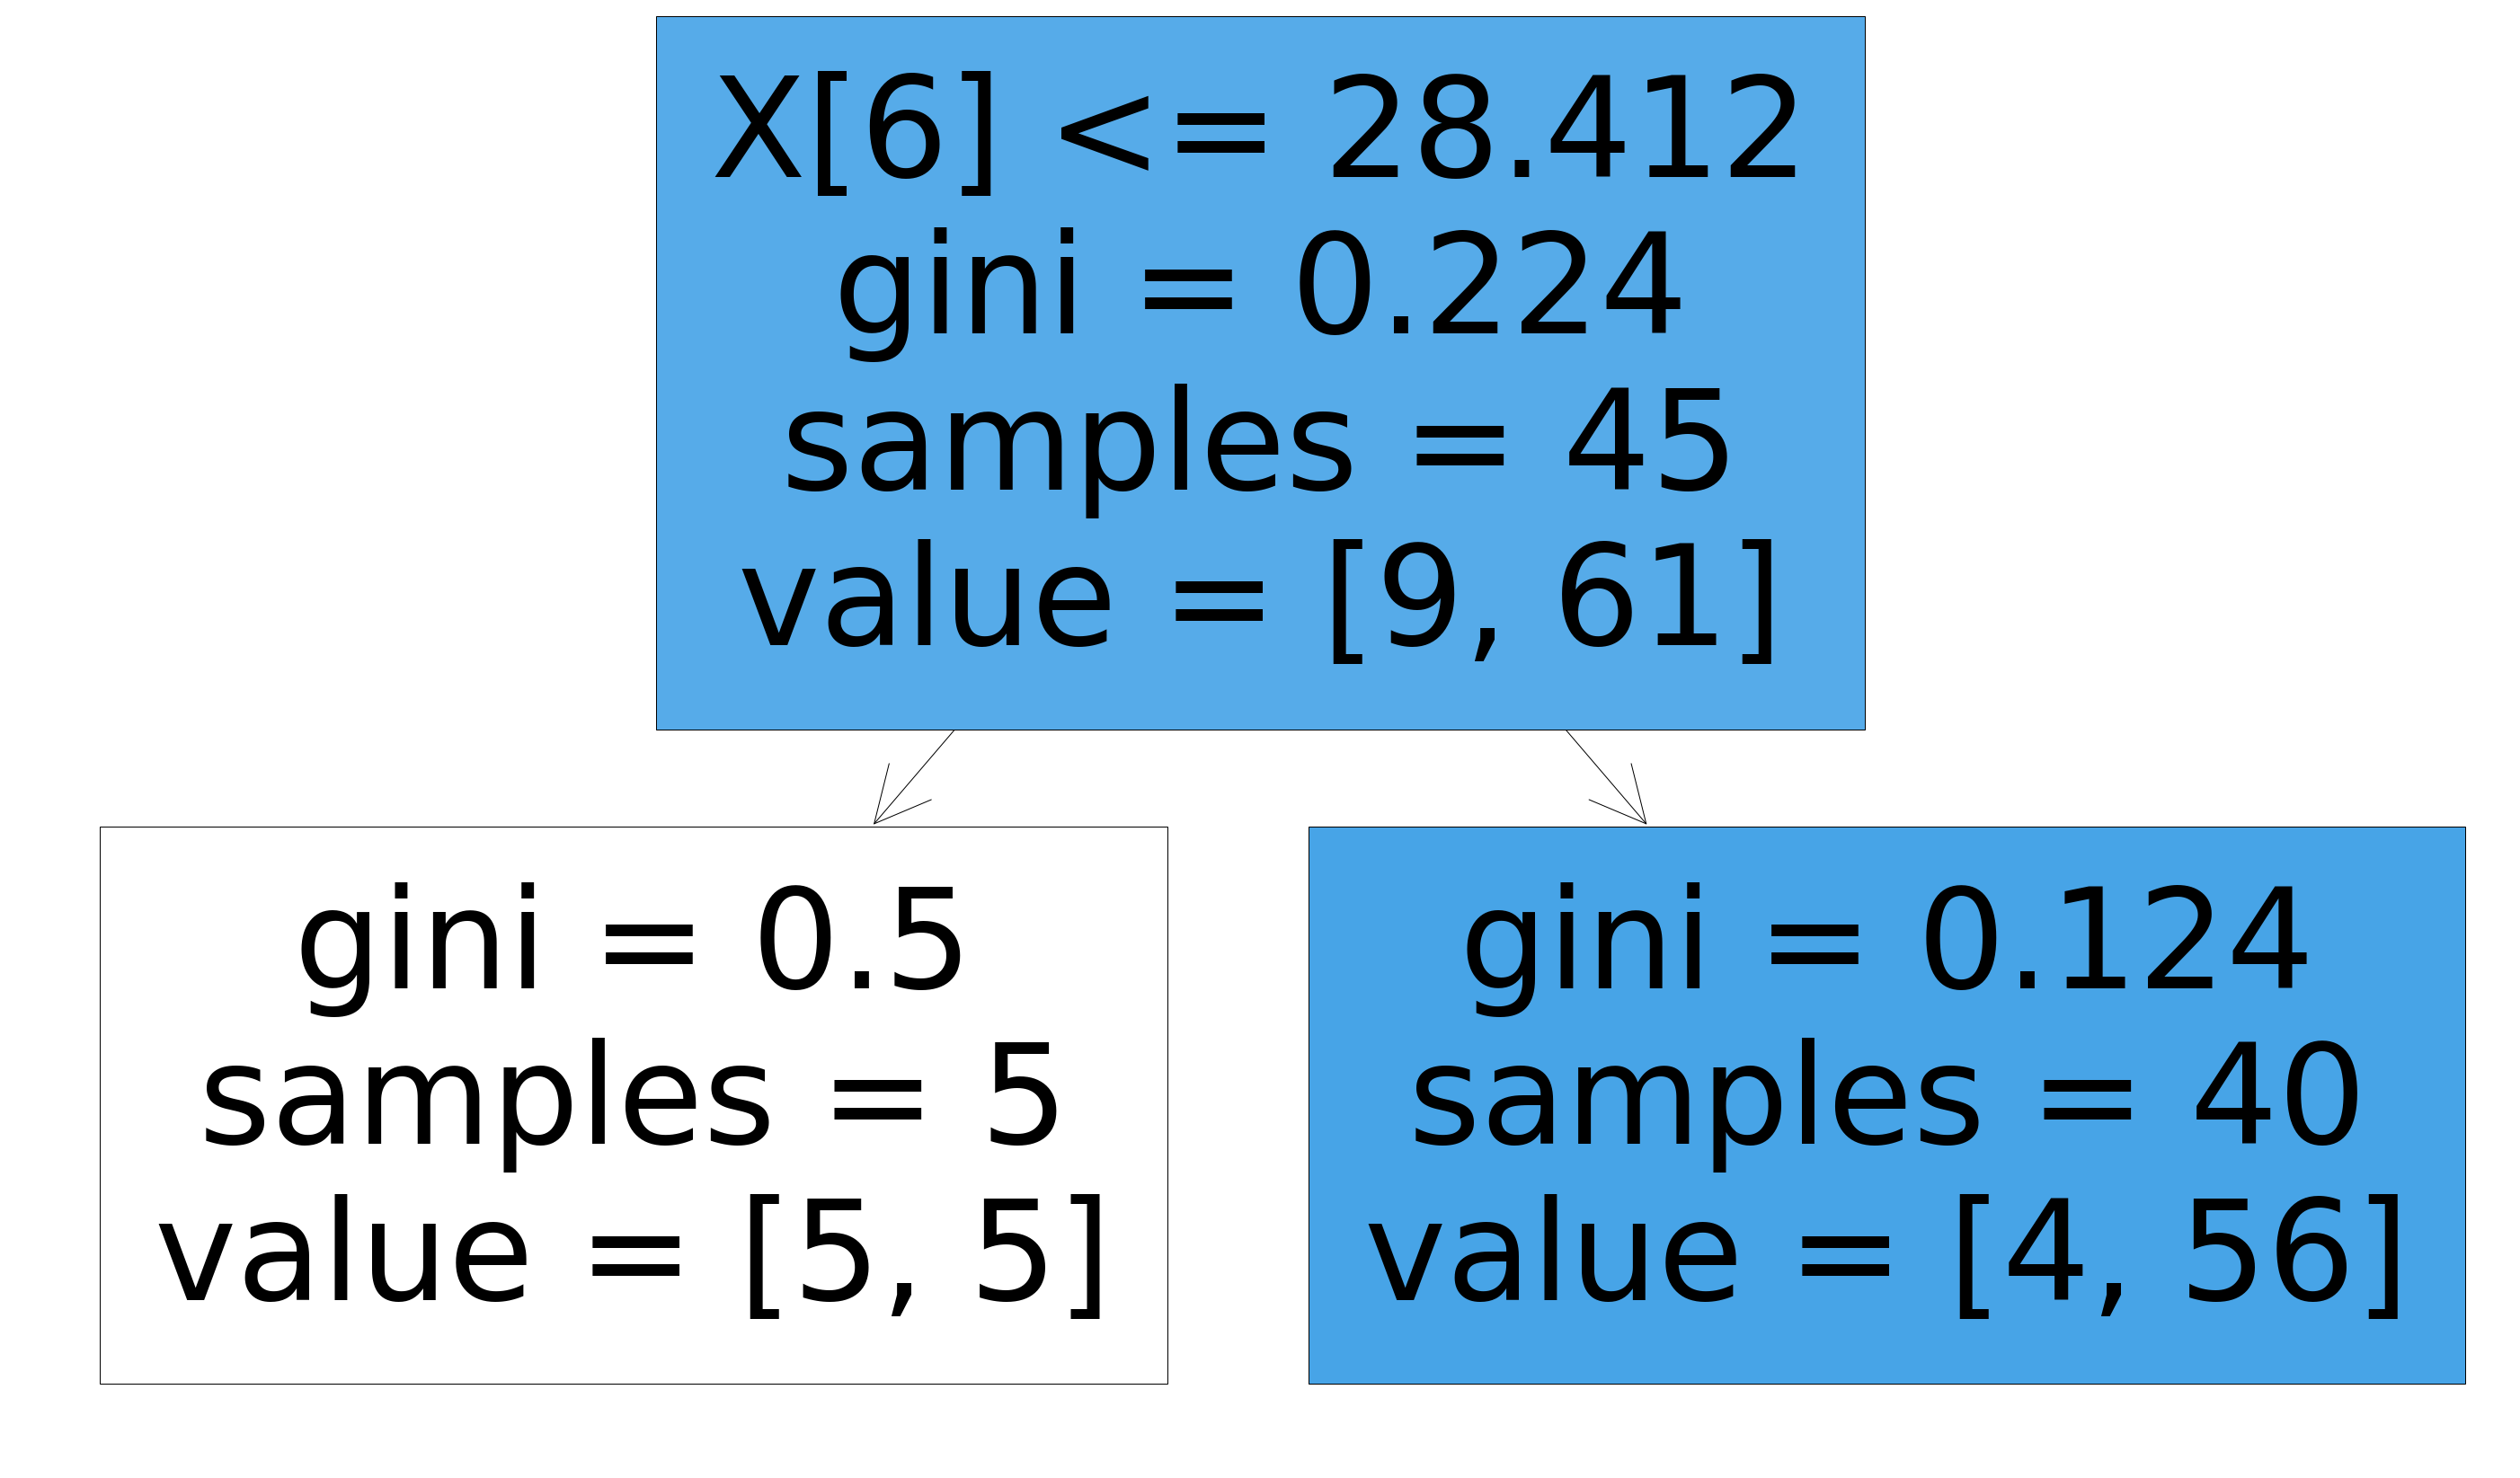

In [263]:
plt.figure(figsize=(50,30))
plot_tree(rfc_best.estimators_[5],filled=True)

Conclusion: As per the predicted score,Linear Regression has the highest prediction score.Predicted Score=1.0